In [5]:
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', ]]
y = df[['Outcome']]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, random_state = 123)



In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)    # training

DecisionTreeClassifier()

In [23]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = dt.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[75 21]
 [14 44]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        96
           1       0.68      0.76      0.72        58

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.77      0.77       154



In [18]:
predict_test

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [25]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = dt.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[404   0]
 [  0 210]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       210

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [26]:
from sklearn import tree

[Text(183.87119017632241, 210.645, 'X[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(75.95195214105793, 197.055, 'X[5] <= 26.95\ngini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(23.61309823677582, 183.465, 'X[5] <= 26.35\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(15.179848866498741, 169.875, 'X[7] <= 59.0\ngini = 0.034\nsamples = 115\nvalue = [113, 2]'),
 Text(8.433249370277078, 156.285, 'X[6] <= 0.675\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(5.059949622166247, 142.695, 'gini = 0.0\nsamples = 91\nvalue = [91, 0]'),
 Text(11.80654911838791, 142.695, 'X[6] <= 0.688\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(8.433249370277078, 129.10500000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(15.179848866498741, 129.10500000000002, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(21.926448362720404, 156.285, 'X[6] <= 0.343\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(18.553148614609572, 142.695, 'gini = 0.0\n

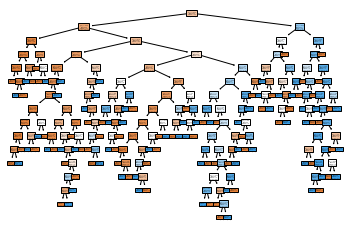

In [28]:
tree.plot_tree(dt, filled=True)

### max_depth= 5

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 5)
dt.fit(X_train, y_train)    # training

DecisionTreeClassifier(max_depth=5)

In [30]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = dt.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[82 14]
 [19 39]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        96
           1       0.74      0.67      0.70        58

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.78       154



In [31]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = dt.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[362  42]
 [ 61 149]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       404
           1       0.78      0.71      0.74       210

    accuracy                           0.83       614
   macro avg       0.82      0.80      0.81       614
weighted avg       0.83      0.83      0.83       614



[Text(191.1784090909091, 199.32, 'X[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(100.82045454545455, 163.07999999999998, 'X[5] <= 26.95\ngini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(49.45909090909091, 126.83999999999999, 'X[5] <= 26.35\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(30.436363636363637, 90.6, 'X[7] <= 59.0\ngini = 0.034\nsamples = 115\nvalue = [113, 2]'),
 Text(15.218181818181819, 54.359999999999985, 'X[6] <= 0.675\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(7.609090909090909, 18.119999999999976, 'gini = 0.0\nsamples = 91\nvalue = [91, 0]'),
 Text(22.827272727272728, 18.119999999999976, 'gini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(45.654545454545456, 54.359999999999985, 'X[6] <= 0.343\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(38.04545454545455, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(53.263636363636365, 18.119999999999976, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 

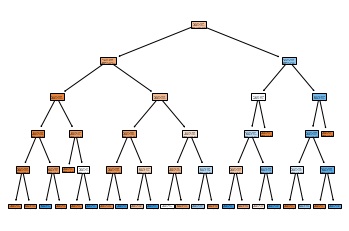

In [32]:
tree.plot_tree(dt, filled=True)

### max_depth= 4

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 4)
dt.fit(X_train, y_train)    # training

DecisionTreeClassifier(max_depth=4)

In [34]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = dt.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[81 15]
 [20 38]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        96
           1       0.72      0.66      0.68        58

    accuracy                           0.77       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [35]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = dt.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[345  59]
 [ 64 146]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       404
           1       0.71      0.70      0.70       210

    accuracy                           0.80       614
   macro avg       0.78      0.77      0.78       614
weighted avg       0.80      0.80      0.80       614



In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 3)
dt.fit(X_train, y_train)    # training

DecisionTreeClassifier(max_depth=3)

In [37]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = dt.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[90  6]
 [33 25]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        96
           1       0.81      0.43      0.56        58

    accuracy                           0.75       154
   macro avg       0.77      0.68      0.69       154
weighted avg       0.76      0.75      0.72       154



In [38]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = dt.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[369  35]
 [111  99]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       404
           1       0.74      0.47      0.58       210

    accuracy                           0.76       614
   macro avg       0.75      0.69      0.71       614
weighted avg       0.76      0.76      0.75       614



[Text(2790.0, 1902.6000000000001, 'X[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(1395.0, 1359.0, 'X[5] <= 26.95\ngini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(697.5, 815.4000000000001, 'X[5] <= 26.35\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(348.75, 271.79999999999995, 'gini = 0.034\nsamples = 115\nvalue = [113, 2]'),
 Text(1046.25, 271.79999999999995, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(2092.5, 815.4000000000001, 'X[1] <= 107.5\ngini = 0.429\nsamples = 343\nvalue = [236, 107]'),
 Text(1743.75, 271.79999999999995, 'gini = 0.278\nsamples = 156\nvalue = [130, 26]'),
 Text(2441.25, 271.79999999999995, 'gini = 0.491\nsamples = 187\nvalue = [106, 81]'),
 Text(4185.0, 1359.0, 'X[1] <= 154.5\ngini = 0.426\nsamples = 143\nvalue = [44, 99]'),
 Text(3487.5, 815.4000000000001, 'X[1] <= 152.5\ngini = 0.5\nsamples = 47\nvalue = [23, 24]'),
 Text(3138.75, 271.79999999999995, 'gini = 0.48\nsamples = 40\nvalue = [16, 24]'),
 Text(3836.2

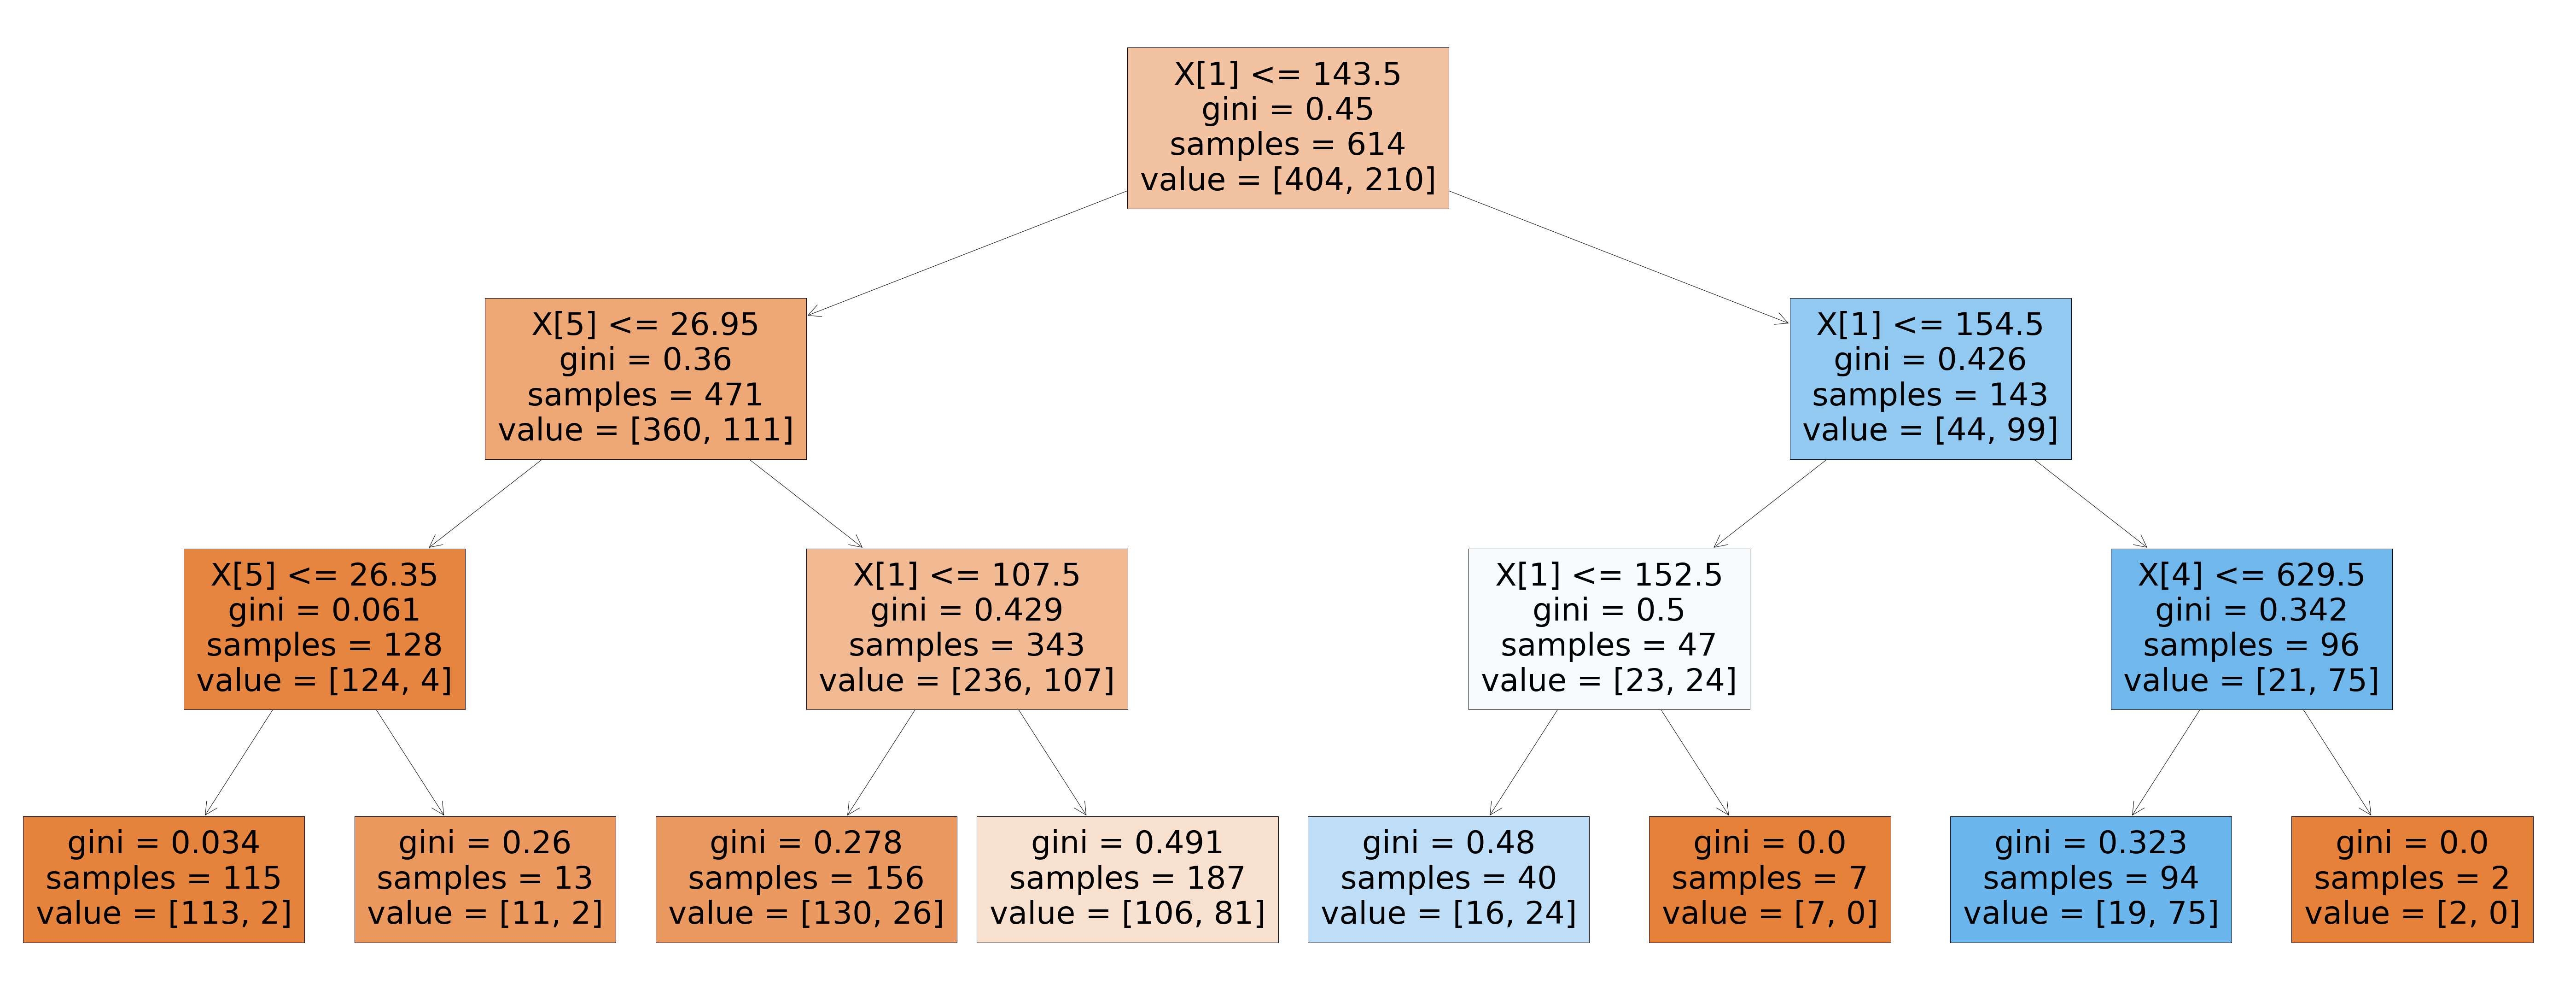

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,40))
tree.plot_tree(dt, filled=True)

[Text(167.4, 190.26, 'X[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(83.7, 135.9, 'X[5] <= 26.95\ngini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 26.35\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(20.925, 27.180000000000007, 'gini = 0.034\nsamples = 115\nvalue = [113, 2]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 107.5\ngini = 0.429\nsamples = 343\nvalue = [236, 107]'),
 Text(104.625, 27.180000000000007, 'gini = 0.278\nsamples = 156\nvalue = [130, 26]'),
 Text(146.475, 27.180000000000007, 'gini = 0.491\nsamples = 187\nvalue = [106, 81]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 154.5\ngini = 0.426\nsamples = 143\nvalue = [44, 99]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 152.5\ngini = 0.5\nsamples = 47\nvalue = [23, 24]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.48\nsamples = 40\nval

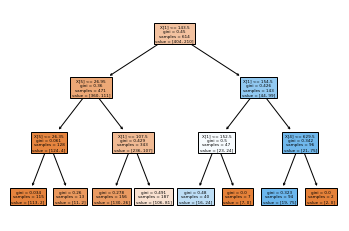

In [42]:
tree.plot_tree(dt, filled=True)

### entropy

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 3)
dt.fit(X_train, y_train)    # training

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
# prediction on test data
print('****** prediction on test data :entropy *******')
predict_test = dt.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data :entropy *******
Confusion Matrix
[[93  3]
 [35 23]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        96
           1       0.88      0.40      0.55        58

    accuracy                           0.75       154
   macro avg       0.81      0.68      0.69       154
weighted avg       0.79      0.75      0.72       154



### Random Forest

In [47]:
df = pd.read_csv('diabetes.csv')

In [48]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', ]]
y = df[['Outcome']]

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, random_state = 123)



In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train, y_train)   # training

<ipython-input-51-c2cd3c0ad76c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [52]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = rf.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[81 15]
 [21 37]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        96
           1       0.71      0.64      0.67        58

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.76      0.77      0.76       154



In [53]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = rf.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[404   0]
 [  0 210]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       210

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



#### Different parameters

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators= 200, criterion= 'entropy', max_depth=6)
rf.fit(X_train, y_train)   # training

<ipython-input-54-3b71a764c9e5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)   # training


RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200)

In [55]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = rf.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[86 10]
 [23 35]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        96
           1       0.78      0.60      0.68        58

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [56]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = rf.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[393  11]
 [ 60 150]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       404
           1       0.93      0.71      0.81       210

    accuracy                           0.88       614
   macro avg       0.90      0.84      0.86       614
weighted avg       0.89      0.88      0.88       614



#### AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
df = pd.read_csv('diabetes.csv')


X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', ]]
y = df[['Outcome']]



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, random_state = 123)

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

C:\Users\Sky\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier()

In [60]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = ada.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[78 18]
 [24 34]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        96
           1       0.65      0.59      0.62        58

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.72      0.73      0.72       154



In [62]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = ada.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[368  36]
 [ 65 145]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       404
           1       0.80      0.69      0.74       210

    accuracy                           0.84       614
   macro avg       0.83      0.80      0.81       614
weighted avg       0.83      0.84      0.83       614



In [63]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 200, learning_rate= 0.5)
ada.fit(X_train, y_train)

C:\Users\Sky\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(learning_rate=0.5, n_estimators=200)

In [64]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = ada.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[78 18]
 [23 35]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        96
           1       0.66      0.60      0.63        58

    accuracy                           0.73       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [65]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = ada.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[376  28]
 [ 55 155]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       404
           1       0.85      0.74      0.79       210

    accuracy                           0.86       614
   macro avg       0.86      0.83      0.84       614
weighted avg       0.86      0.86      0.86       614



### XgBoost

In [68]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)    # training

C:\Users\Sky\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = xgb.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[80 16]
 [17 41]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        96
           1       0.72      0.71      0.71        58

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [70]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = xgb.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[404   0]
 [  0 210]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       210

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



### SVM

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

In [1]:



df = pd.read_csv('diabetes.csv')

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', ]]
y = df[['Outcome']]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, random_state = 123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



<IPython.core.display.Javascript object>

(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [3]:
from sklearn import svm

svm_mdl = svm.SVC()

svm_mdl.fit(X_train, y_train)   # training


C:\Users\Sky\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [7]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = svm_mdl.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[90  6]
 [28 30]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        96
           1       0.83      0.52      0.64        58

    accuracy                           0.78       154
   macro avg       0.80      0.73      0.74       154
weighted avg       0.79      0.78      0.76       154



In [8]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = svm_mdl.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[370  34]
 [110 100]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       404
           1       0.75      0.48      0.58       210

    accuracy                           0.77       614
   macro avg       0.76      0.70      0.71       614
weighted avg       0.76      0.77      0.75       614



### NB

In [10]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

C:\Users\Sky\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [11]:
# prediction on test data
print('****** prediction on test data *******')
predict_test = nb.predict(X_test)

# Actual Value : y_test
# prediction : predict_test
print('Confusion Matrix')
print(confusion_matrix(y_test, predict_test))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predict_test))

****** prediction on test data *******
Confusion Matrix
[[67 29]
 [37 21]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        96
           1       0.42      0.36      0.39        58

    accuracy                           0.57       154
   macro avg       0.53      0.53      0.53       154
weighted avg       0.56      0.57      0.56       154



In [12]:
# prediction on train data
print('****** prediction on train data *******')
predict_train = nb.predict(X_train)

# Actual Value : y_train
# prediction : predict_train
print('Confusion Matrix')
print(confusion_matrix(y_train, predict_train))

print('---------------------------------------------------')
print('Classification Report')
print(classification_report(y_train, predict_train))

****** prediction on train data *******
Confusion Matrix
[[272 132]
 [114  96]]
---------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       404
           1       0.42      0.46      0.44       210

    accuracy                           0.60       614
   macro avg       0.56      0.57      0.56       614
weighted avg       0.61      0.60      0.60       614

